In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Get the ranking Data
rankings = pd.read_csv("https://raw.githubusercontent.com/iamtlcs/STAT3011-Group5-Project2/main/fifa_ranking-2022-12-22.csv")

# Fix some country names
rankings = rankings.replace({"IR Iran": "Iran",'Netherlands': 'Netherland'})

In [2]:
rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,74,Madagascar,MAD,18.0,0.0,0,CAF,1992-12-31
1,52,Qatar,QAT,27.0,0.0,0,AFC,1992-12-31
2,51,Senegal,SEN,27.0,0.0,0,CAF,1992-12-31
3,50,El Salvador,SLV,28.0,0.0,0,CONCACAF,1992-12-31
4,49,Korea Republic,KOR,28.0,0.0,0,AFC,1992-12-31


In [3]:
# Get the match Data
matches = pd.read_csv("https://raw.githubusercontent.com/iamtlcs/STAT3011-Group5-Project2/main/till-2022-results.csv")
# Fix some country names
matches =  matches.replace({'Germany DR': 'Germany', 'China': 'China PR'})

In [4]:
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
# we want to have the ranks for every day 
# We use resample to sample by Day and get the first date
rankings = rankings.set_index(['rank_date'])\
            .fillna(method='ffill')\
            .reset_index()
  
rankings

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,1992-12-31,74,Madagascar,MAD,18.00,0.00,0,CAF
1,1992-12-31,52,Qatar,QAT,27.00,0.00,0,AFC
2,1992-12-31,51,Senegal,SEN,27.00,0.00,0,CAF
3,1992-12-31,50,El Salvador,SLV,28.00,0.00,0,CONCACAF
4,1992-12-31,49,Korea Republic,KOR,28.00,0.00,0,AFC
...,...,...,...,...,...,...,...,...
64122,2022-12-22,136,Solomon Islands,SOL,1095.70,1095.70,0,OFC
64123,2022-12-22,135,Turkmenistan,TKM,1100.47,1100.47,0,AFC
64124,2022-12-22,134,Philippines,PHI,1113.15,1115.13,1,AFC
64125,2022-12-22,132,Central African Republic,CTA,1116.97,1116.97,0,CAF


In [6]:
# join the ranks
# First we do it for the Home team
matches = matches.merge(rankings, 
                        left_on=['date', 'home_team'], 
                        right_on=['rank_date', 'country_full'])
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-08-08,59,Bolivia,BOL,31.0,14.0,-28,CONMEBOL
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-08-08,8,Brazil,BRA,54.0,56.0,5,CONMEBOL
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-08-08,35,Ecuador,ECU,40.0,23.0,-30,CONMEBOL
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-08-08,65,Guinea,GUI,28.0,24.0,2,CAF
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-08-08,67,Paraguay,PAR,27.0,22.0,-1,CONMEBOL


In [7]:
# Next we do it for the Away teams
matches = matches.merge(rankings, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], 
                        suffixes=('_home', '_away'))
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,rank_change_home,confederation_home,rank_date_away,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-08-08,...,-28,CONMEBOL,1993-08-08,22,Uruguay,URU,46.0,48.0,6,CONMEBOL
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-08-08,...,5,CONMEBOL,1993-08-08,14,Mexico,MEX,50.0,43.0,-11,CONCACAF
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-08-08,...,-30,CONMEBOL,1993-08-08,94,Venezuela,VEN,14.0,5.0,-31,CONMEBOL
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-08-08,...,2,CAF,1993-08-08,86,Sierra Leone,SLE,18.0,16.0,7,CAF
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-08-08,...,-1,CONMEBOL,1993-08-08,5,Argentina,ARG,56.0,51.0,-5,CONMEBOL


In [8]:
# feature generation
matches['rank_difference'] = matches['rank_home'] - matches['rank_away']
matches['average_rank'] = (matches['rank_home'] + matches['rank_away'])/2
matches['point_difference'] = matches['total_points_home'] - matches['total_points_away']
matches['score_difference'] = matches['home_score'] - matches['away_score']
matches['is_won'] = matches['score_difference'] > 0 # take draw as lost
matches['is_stake'] = matches['tournament'] != 'Friendly'

matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,total_points_away,previous_points_away,rank_change_away,confederation_away,rank_difference,average_rank,point_difference,score_difference,is_won,is_stake
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-08-08,...,46.0,48.0,6,CONMEBOL,37,40.5,-15.0,2,True,True
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-08-08,...,50.0,43.0,-11,CONCACAF,-6,11.0,4.0,0,False,False
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-08-08,...,14.0,5.0,-31,CONMEBOL,-59,64.5,26.0,5,True,True
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-08-08,...,18.0,16.0,7,CAF,-21,75.5,10.0,1,True,False
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-08-08,...,56.0,51.0,-5,CONMEBOL,62,36.0,-29.0,-2,False,True


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn import ensemble
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# We look at only 4 features
X, y = matches.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake']], matches['is_won']

# Create our test and train datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [21]:
X.head()

,average_rank,rank_difference,point_difference,is_stake
0,40.5,37,-15.0,True
1,11.0,-6,4.0,False
2,64.5,-59,26.0,True
3,75.5,-21,10.0,False
4,36.0,62,-29.0,True


[[70 28]
 [23 55]]
              precision    recall  f1-score   support

       False       0.75      0.71      0.73        98
        True       0.66      0.71      0.68        78

    accuracy                           0.71       176
   macro avg       0.71      0.71      0.71       176
weighted avg       0.71      0.71      0.71       176

NAIVEBAYES Accuracy :  0.7102272727272727
NAIVEBAYES Auc:  0.7097069597069597


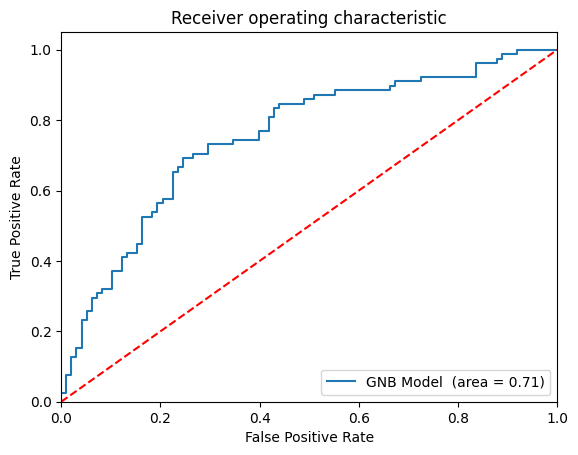

In [22]:
### Gussian Naive Bayes Algorithm
gnb = GaussianNB()
 
 
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
 
print(confusion_matrix(y_test, y_pred_gnb))
 
print(classification_report(y_test, y_pred_gnb))
 
 
### Model Accuracies
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print ("NAIVEBAYES Accuracy : " ,accuracy_gnb)
 
 
gnb_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
print ("NAIVEBAYES Auc: ", gnb_roc_auc)
 
 
fpr1_gnb, tpr1_gnb, thresholds1_gnb = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
 
### Plot the ROC curves
plt.figure()
plt.plot(fpr1_gnb, tpr1_gnb, label='GNB Model  (area = %0.2f)' % gnb_roc_auc)
 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [23]:
# Get the world cup fixture data
world_cup = pd.read_csv("https://raw.githubusercontent.com/iamtlcs/STAT3011-Group5-Project2/main/Worldcup2022.csv")



# set index to team 
world_cup = world_cup.set_index('Team')

In [24]:
world_cup

,Group,First match\n against,Second match\n against,Third match\n against
Team,,,,
Qatar,A,Ecuador,Senegal,Netherland
Ecuador,A,Qatar,Netherland,Senegal
Senegal,A,Netherland,Qatar,Ecuador
Netherland,A,Senegal,Ecuador,Qatar
England,B,Iran,USA,Wales
Iran,B,England,Wales,USA
Wales,B,USA,Iran,England
USA,B,Wales,England,Iran
Poland,C,Mexico,Saudi Arabia,Argentina


In [25]:
# let's define a small margin that we add, so that we predict draws when probabilies lie between 0.475 and 0.525
margin = 0.025

# let's define the rankings at the time of the World Cup (so we sort on 2022/10/06 rankings)
world_cup_rankings = rankings.loc[(rankings['rank_date'] == rankings['rank_date'][0:63915].max()) & 
                                    rankings['country_full'].isin(world_cup.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])
world_cup_rankings

,rank_date,rank,country_abrv,total_points,previous_points,rank_change,confederation
country_full,,,,,,,
Cameroon,2022-10-06,43,CMR,1471.44,1484.95,5,CAF
Ghana,2022-10-06,61,GHA,1393.00,1393.47,1,CAF
Qatar,2022-10-06,50,QAT,1439.89,1441.97,2,AFC
Serbia,2022-10-06,21,SRB,1563.62,1549.53,-4,UEFA
Iran,2022-10-06,20,IRN,1564.61,1558.64,-2,AFC
Wales,2022-10-06,19,WAL,1569.82,1582.13,0,UEFA
Senegal,2022-10-06,18,SEN,1584.38,1584.59,0,CAF
USA,2022-10-06,16,USA,1627.48,1635.01,2,CONCACAF
Switzerland,2022-10-06,15,SUI,1635.92,1621.43,-1,UEFA


In [26]:
from itertools import combinations

opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

world_cup['points'] = 0
world_cup['total_prob'] = 0

# We iterate through each game in the schedule, doing each group at a time
for group in set(world_cup['Group']):
    print('___Starting group {}:___'.format(group))

    for home, away in combinations(world_cup.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)

        # Get features for each team competiting in the fixture
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'total_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'total_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        
        # get the prediction proability of the home team winning
        home_win_prob = gnb.predict_proba(row)[:,1][0]
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob
        
        points = 0
        # Allocate points 
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup.loc[home, 'points'] += 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print("Draw")
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1

___Starting group B:___
England vs. Iran: England wins with 0.69
England vs. Wales: England wins with 0.68
England vs. USA: England wins with 0.63
Iran vs. Wales: Draw
Iran vs. USA: USA wins with 0.54
Wales vs. USA: USA wins with 0.53
___Starting group H:___
Ghana vs. Korea Republic: Korea Republic wins with 0.70
Ghana vs. Uruguay: Uruguay wins with 0.83
Ghana vs. Portugal: Portugal wins with 0.86
Korea Republic vs. Uruguay: Uruguay wins with 0.62
Korea Republic vs. Portugal: Portugal wins with 0.67
Uruguay vs. Portugal: Portugal wins with 0.53
___Starting group A:___
Qatar vs. Ecuador: Draw
Qatar vs. Senegal: Senegal wins with 0.71
Qatar vs. Netherland: Netherland wins with 0.82
Ecuador vs. Senegal: Senegal wins with 0.67
Ecuador vs. Netherland: Netherland wins with 0.79
Senegal vs. Netherland: Netherland wins with 0.61
___Starting group E:___
Japan vs. Costa Rica: Japan wins with 0.61
Japan vs. Spain: Spain wins with 0.67
Japan vs. Germany: Germany wins with 0.60
Costa Rica vs. Spain

In [27]:
world_cup

,Group,First match\n against,Second match\n against,Third match\n against,points,total_prob
Team,,,,,,
Qatar,A,Ecuador,Senegal,Netherland,1,0.986293
Ecuador,A,Qatar,Netherland,Senegal,1,1.026453
Senegal,A,Netherland,Qatar,Ecuador,6,1.769752
Netherland,A,Senegal,Ecuador,Qatar,9,2.217502
England,B,Iran,USA,Wales,9,1.998515
Iran,B,England,Wales,USA,1,1.302055
Wales,B,USA,Iran,England,1,1.270989
USA,B,Wales,England,Iran,6,1.428442
Poland,C,Mexico,Saudi Arabia,Argentina,3,1.376418


In [28]:
# Hardcode the mappings
pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup = world_cup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = world_cup.groupby('Group').nth([0, 1]) # select the top 2
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

next_round_wc.sort_values(by='Group')

,Group,First match\n against,Second match\n against,Third match\n against,points,total_prob
Team,,,,,,
Netherland,A,Senegal,Ecuador,Qatar,9,2.217502
Senegal,A,Netherland,Qatar,Ecuador,6,1.769752
USA,B,Wales,England,Iran,6,1.428442
England,B,Iran,USA,Wales,9,1.998515
Argentina,C,Saudi Arabia,Mexico,Poland,9,2.269736
Mexico,C,Poland,Argentina,Saudi Arabia,6,1.738405
Denmark,D,Tunisia,France,Australia,6,1.836366
France,D,Australia,Denmark,Tunisia,9,2.168295
Spain,E,Costa Rica,Germany,Japan,9,1.989904


In [29]:
finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = list()
odds = list()

# for each knockout stage
for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        # get the teams playing
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        
        # get the features for each team
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'total_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'total_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points

        # Get the winner
        home_win_prob = gnb.predict_proba(row)[:,1][0]
        
        # Display resultes
        if gnb.predict_proba(row)[:,1] <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        # Display winning team and probability of victory
        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_rankings.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

___Starting of the round_of_16___
Netherland vs. USA: Netherland wins with probability 0.60
Argentina vs. Denmark: Argentina wins with probability 0.61
Spain vs. Croatia: Spain wins with probability 0.59
Brazil vs. Uruguay: Brazil wins with probability 0.69
Senegal vs. England: England wins with probability 0.65
Mexico vs. France: France wins with probability 0.61
Germany vs. Belgium: Belgium wins with probability 0.66
Switzerland vs. Portugal: Portugal wins with probability 0.54


___Starting of the quarterfinal___
Netherland vs. Argentina: Argentina wins with probability 0.57
Spain vs. Brazil: Brazil wins with probability 0.61
England vs. France: France wins with probability 0.52
Belgium vs. Portugal: Belgium wins with probability 0.63


___Starting of the semifinal___
Argentina vs. Brazil: Brazil wins with probability 0.55
France vs. Belgium: Belgium wins with probability 0.54


___Starting of the final___
Brazil vs. Belgium: Brazil wins with probability 0.53


